<h1 style="font-size:2em; color:white; font-weight:bold; background-color:#1976d2;
           padding:15px; text-align:center; border-radius:10px;">
DỰ ĐOÁN TÌNH TRẠNG SỨC KHỎE CỦA CHÓ <br> DỰA TRÊN GIỐNG VÀ ĐẶC TRƯNG LIÊN QUAN
</h1>


# **Thông tin bài làm**

* **Tên môn học:** Học máy

* **Mã môn học:** CO3117

* **Học kỳ:** 251

* **Năm học:** 2025

* **Giảng viên hướng dẫn:** TS. Lê Thành Sách  

* **Tên nhóm:** CSML25
| Họ và tên            | MSSV     | Email      |
|-----------------------|----------|----------------|
| Nguyễn Đăng Khánh       | 2311512  | khanh.nguyennttt040905@hcmut.edu.vn  |
| Bùi Ngọc Phúc     | 2312665  | phuc.buif2175@hcmut.edu.vn     |
| Đinh Hoàng Chung | 2310359  | chung.dinhhoang@hcmut.edu.vn     |

* **Giới thiệu bộ dữ liệu**
  * Tên: Canine Wellness Classification Dataset (Synthetic, 10,000 Samples).

  * Mô tả: Bộ dữ liệu tổng hợp này mô phỏng nhiều giống chó và các đặc điểm liên quan đến sức khỏe của chúng. Nó được thiết kế cho các tác vụ phân loại nhị phân, trong đó biến mục tiêu là liệu một con chó được coi là khỏe mạnh ("Có") hay không khỏe mạnh ("Không").  

  * Nguồn: Bộ dữ liệu được lấy từ Kaggle, đây là bộ dữ liệu giả lập (synthetic dataset) nhưng được thiết kế sát thực tế, phản ánh nhiều khía cạnh trong chăm sóc thú cưng.  

  * Thông tin về bộ dữ liệu:
    * Tổng số mẫu: khoảng 10,000 mẫu.  
    * Số feature: gồm cả numeric (tuổi, cân nặng, chỉ số sức khỏe) và categorical (giống loài, tình trạng neutered/spayed, …).  
    * Format dữ liệu: Numeric và categorical.  
    * Link dataset: [Canine Wellness Dataset ](https://www.kaggle.com/datasets/aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples).  

* **Mục tiêu của bài toán**
  * Hiểu và áp dụng được quy trình pipeline học máy truyền thống, bao gồm:
tiền xử lý dữ liệu, trích xuất đặc trưng, huấn luyện và đánh giá mô hình.
  * Rèn luyện kỹ năng triển khai mô hình học máy trên các loại dữ liệu khác nhau: bảng, văn bản, và ảnh.
  * Phát triển khả năng phân tích, so sánh, và đánh giá hiệu quả của các mô hình
học máy thông qua các chỉ số đo lường.  
  * Rèn luyện kỹ năng lập trình, thử nghiệm, và tổ chức báo cáo khoa học.
  * **Bắt buộc**: triển khai pipeline học máy truyền thống trên ít nhất một loại dữ
liệu.
  * **Khuyến khích**: nếu có thể, thực hiện thêm pipeline học sâu (deep learning) để
so sánh với pipeline truyền thống. Các nhóm có phần mở rộng này sẽ được cộng
điểm thưởng.

* **Các mô hình sẽ được triển khai:**
  * Logistic Regression
  * Random Forest  
  * SVM
  * MLP


In [580]:
from google.colab import drive
import pandas as pd
import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix,
    roc_curve, precision_recall_curve, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
!pip install kagglehub --quiet
import kagglehub, os, pandas as pd

# tải dataset về cache (~/.cache/kagglehub)
path = kagglehub.dataset_download(
    "aaronisomaisom3/canine-wellness-dataset-synthetic-10k-samples"
)

# đọc file CSV
csv_path = os.path.join(path, "synthetic_dog_breed_health_data.csv")
target_col = "Healthy"

df = pd.read_csv(csv_path, keep_default_na=False, na_values=[""])

pd.set_option("display.max_columns", 200)
sns.set_theme(context="notebook", style="whitegrid")


Using Colab cache for faster access to the 'canine-wellness-dataset-synthetic-10k-samples' dataset.


# **I.  EDA (Exploratory Data Analysis)**


## **1. Tổng quan dữ liệu**

In [581]:
print("Hiển thị 5 dòng đầu tiên của bộ dữ liệu:")
display(df.head())
print("\nTập dữ liệu có số lượng mẫu quan sát và số cột lần lượt là:")
display(df.shape)

Hiển thị 5 dòng đầu tiên của bộ dữ liệu:


,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,None,NaN,Wellness,5.0,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,NaN,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,2.0,Yes,No,No,11.0,3.0,None,0.0,47.0,Yes,NaN
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,None,Very Active,NaN,Special,4.0,No,No,No,12.0,NaN,None,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,None,Very Active,Wet food,Purina,3.0,Yes,Yes,No,9.0,1.0,None,0.0,64.0,Yes,No



Tập dữ liệu có số lượng mẫu quan sát và số cột lần lượt là:


(10000, 21)

In [582]:
print("Thông tin tổng quát của tập dữ liệu:\n")
display(df.info())



Thông tin tổng quát của tập dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Breed                        9710 non-null   object 
 2   Breed Size                   9712 non-null   object 
 3   Sex                          9675 non-null   object 
 4   Age                          9709 non-null   float64
 5   Weight (lbs)                 9709 non-null   float64
 6   Spay/Neuter Status           9692 non-null   object 
 7   Daily Activity Level         9677 non-null   object 
 8   Diet                         9698 non-null   object 
 9   Food Brand                   9700 non-null   object 
 10  Daily Walk Distance (miles)  9706 non-null   float64
 11  Other Pets in Household      9702 non-null   object 
 12  Medications                  9751 non

None

In [583]:
num_cols = [col for col in df.select_dtypes(include=[np.number]) if col != target_col]
cat_cols = [col for col in df.select_dtypes(include=["object", "category", "bool"]) if col != target_col]
print(f"\nSố lượng cột dữ liệu kiểu số (Numeric): {len(num_cols)}\nSố lượng cột dữ liệu kiểu phân loại (Categorical): {len(cat_cols)}")



Số lượng cột dữ liệu kiểu số (Numeric): 8
Số lượng cột dữ liệu kiểu phân loại (Categorical): 12


In [584]:
def check_uniques(data, ignore=None):
    if ignore:
        data = data.drop(columns=ignore, errors="ignore")
    nuniq = data.nunique()
    percentage = (nuniq / len(data) * 100).round(2)
    result = (
        nuniq.to_frame("Unique value count")
        .assign(**{"Unique value percentage(%)": percentage})
        .sort_values("Unique value percentage(%)", ascending=False)
    )
    print("\nThống kê số lượng unique values (Không tính cột ID):\n")
    return result

check_uniques(df, ignore=["ID"])



Thống kê số lượng unique values (Không tính cột ID):



,Unique value count,Unique value percentage(%)
Weight (lbs),95,0.95
Average Temperature (F),71,0.71
Breed,15,0.15
Age,13,0.13
Daily Walk Distance (miles),9,0.09
Food Brand,9,0.09
Hours of Sleep,7,0.07
Owner Activity Level,5,0.05
Annual Vet Visits,5,0.05
Daily Activity Level,5,0.05


## **2. Thống kê mô tả dữ liệu**

### **2.1 Thống kê mô tả cho các đặc trưng kiểu số (numeric features)**

In [585]:
print("\nThống kê mô tả cho các đặc trưng kiểu số (numeric features):\n")
display(df.describe().T[["mean", "50%", "std", "min", "25%", "75%", "max"]])


Thống kê mô tả cho các đặc trưng kiểu số (numeric features):



,mean,50%,std,min,25%,75%,max
ID,5000.500000,5000.5,2886.895680,1.0,2500.75,7500.25,10000.0
Age,7.063858,7.0,3.751616,1.0,4.00,10.00,13.0
Weight (lbs),50.202493,50.0,14.900010,10.0,40.00,60.00,109.0
Daily Walk Distance (miles),2.527818,3.0,1.458157,0.0,1.25,3.00,8.0
Hours of Sleep,11.006995,11.0,1.463321,8.0,10.00,12.00,14.0
Play Time (hrs),1.524095,2.0,0.979939,0.0,1.00,2.00,4.0
Annual Vet Visits,1.474727,1.0,1.152881,0.0,1.00,2.00,4.0
Average Temperature (F),64.559606,64.0,14.824669,30.0,54.00,75.00,100.0


### **2.2 Thống kê mô tả cho các đặc trưng kiểu phân loại (categorical features)**

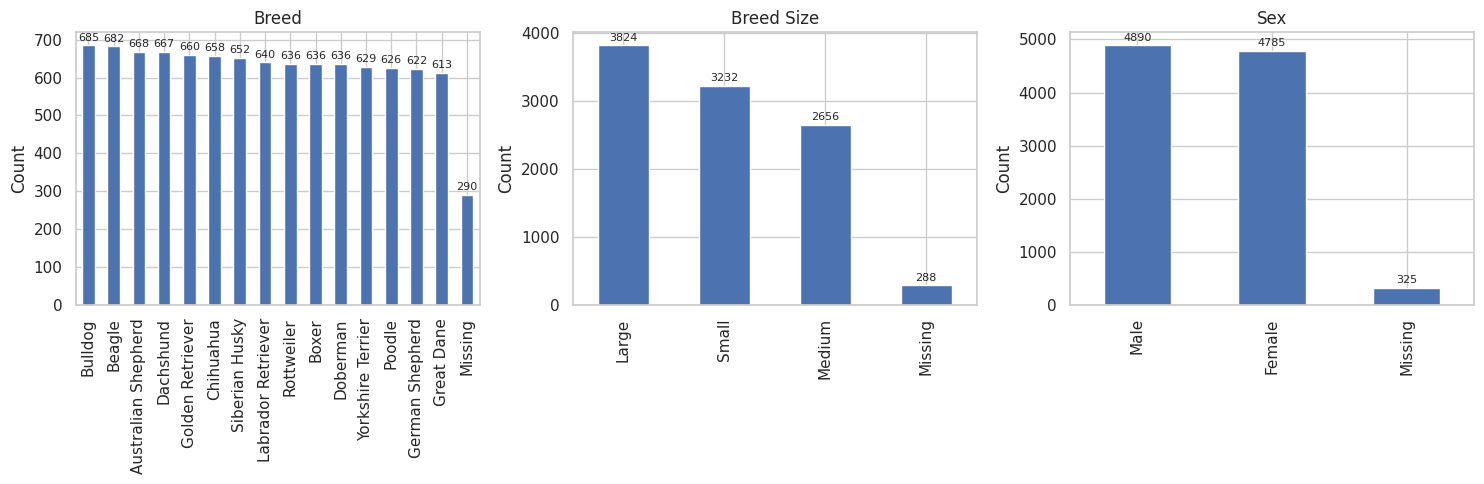

In [586]:
def bar_chart_categorical(df, exclude=None, ncols=5, first=0, last=None,
                          rotation=90, label_fontsize=8, cell_w=5, cell_h=5):
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    if exclude is not None:
        cat_cols = [col for col in cat_cols if col not in exclude]
    n_total = len(cat_cols)
    last = n_total - 1 if last is None else min(last, n_total - 1)
    first = max(0, first)
    cols_to_plot = cat_cols[first:last + 1]
    n = len(cols_to_plot)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * cell_w, nrows * cell_h))
    axes = [axes] if isinstance(axes, plt.Axes) else axes.flatten()
    for i in range(len(cols_to_plot)):
        col = cols_to_plot[i]
        series = df[col].copy()
        series = series.where(series.notna(), "Missing")
        freq = series.value_counts()
        ax = axes[i]
        freq.plot(kind="bar", ax=ax, title=col)
        ax.set_ylabel("Count")
        ax.set_xlabel("")
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', fontsize=label_fontsize, padding=2)
        ax.tick_params(axis="x", rotation=rotation)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

bar_chart_categorical(df, exclude=["Healthy"], ncols=3, first=0, last=2)



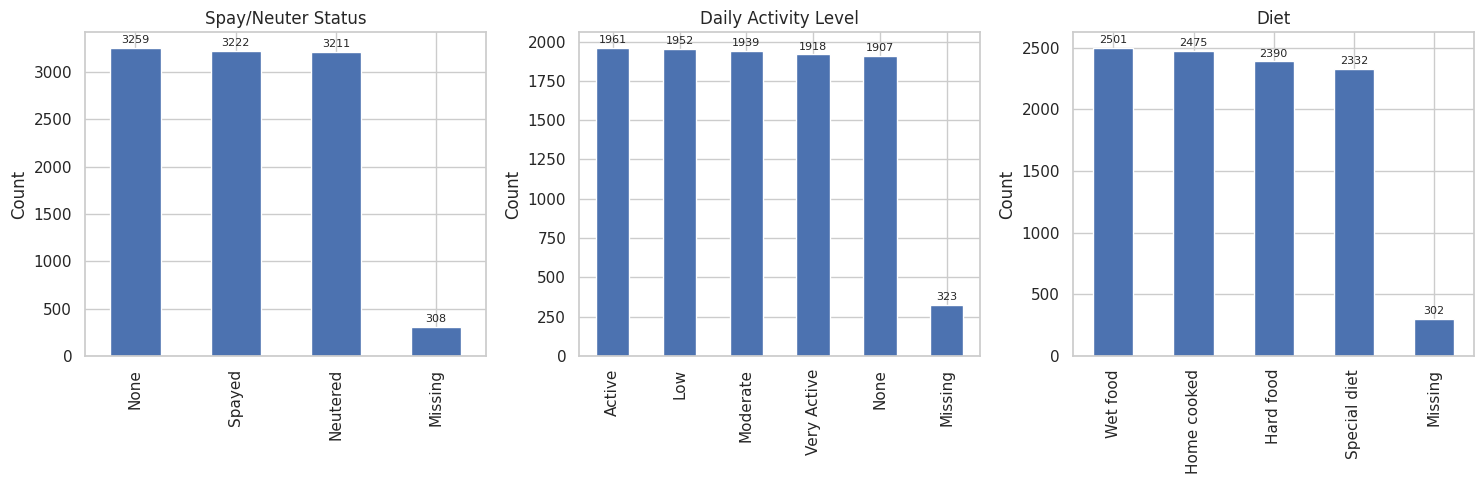

In [587]:
bar_chart_categorical(df, exclude=["Healthy"], ncols=3, first=3, last=5)


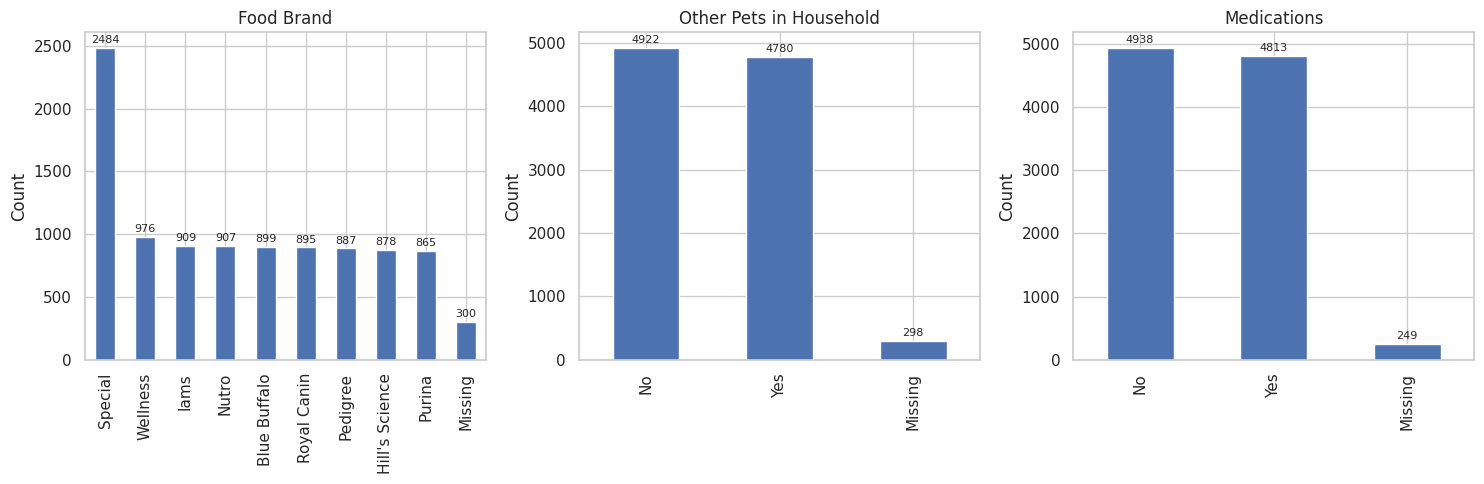

In [588]:
bar_chart_categorical(df, exclude=["Healthy"], ncols=3, first=6, last=8)

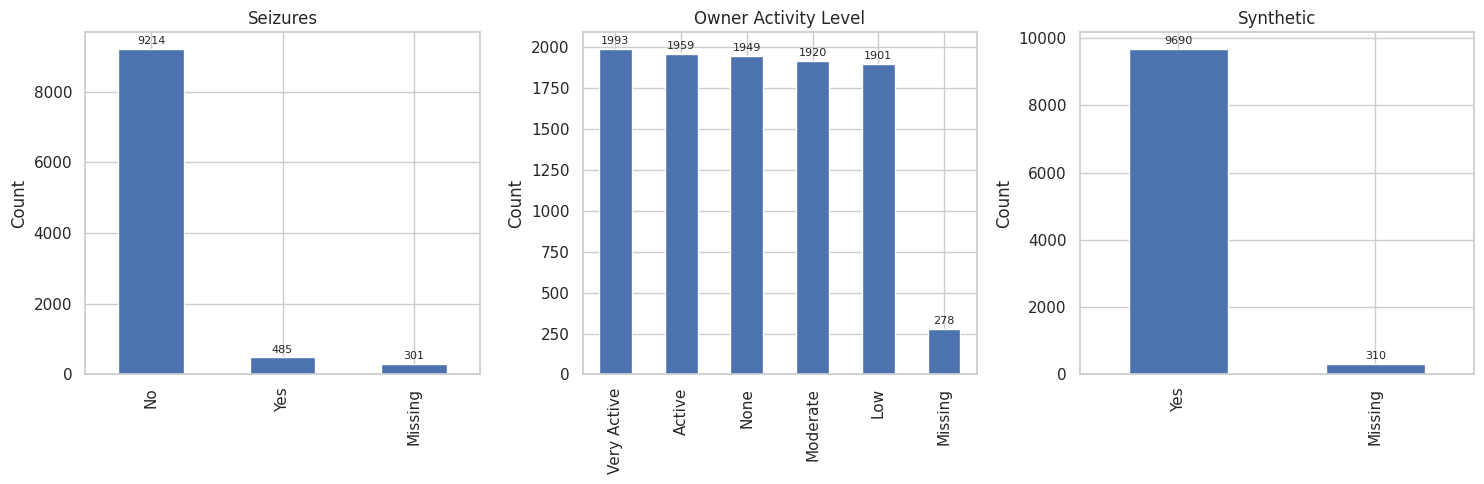

In [589]:
bar_chart_categorical(df, exclude=["Healthy"], ncols=3, first=9, last=None)

###**2.3 Thống kê mô tả cho biến mục tiêu**

In [590]:
def target_table(df, target_col):
    series = df[target_col].copy()
    series = series.where(series.notna(), "Missing")
    counts = series.value_counts(dropna=False)
    percents = (counts / len(df) * 100).round(2)
    summary = pd.DataFrame({
        "Category": counts.index.astype(str),
        "Count": counts.values,
        "Percent": [f"{p}%" for p in percents.values]
    })
    summary = summary.sort_values("Count", ascending=False).reset_index(drop=True)
    display(summary)

print("\nPhân bố của biến mục tiêu:\n")
target_table(df, "Healthy")



Phân bố của biến mục tiêu:



,Category,Count,Percent
0,Yes,7178,71.78%
1,No,2500,25.0%
2,Missing,322,3.22%



Phân bố của biến mục tiêu:



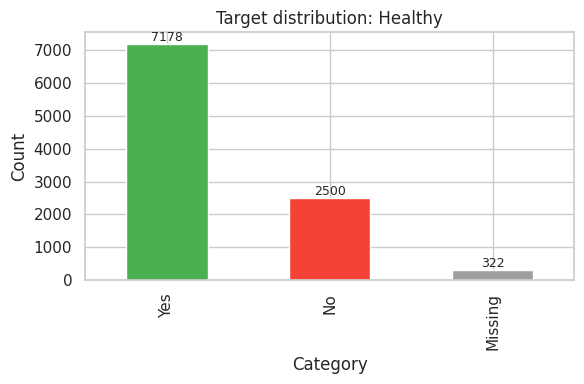

In [591]:
def target_barchart(df, target_col, colors=["#4CAF50", "#F44336", "#9E9E9E"]):
    series = df[target_col].copy()
    series = series.where(series.notna(), "Missing")
    freq = series.value_counts(dropna=False)
    ax = freq.plot(kind="bar", figsize=(6,4), color=colors[:len(freq)], title="Target distribution: " + target_col)
    ax.set_ylabel("Count")
    ax.set_xlabel("Category")
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

print("\nPhân bố của biến mục tiêu:\n")
target_barchart(df, "Healthy")


##**3. Phát hiện dữ liệu thiếu (Missing value)**

In [592]:
def missing_table(data):
    null_counts = data.isnull().sum()
    null_percents = (data.isnull().mean() * 100).round(2)

    report = pd.DataFrame({
        "Column": data.columns,
        "Missing count": null_counts.values,
        "Missing Percentage": null_percents.values
    }).sort_values("Missing count", ascending=False).reset_index(drop=True)
    report["Missing Percentage"] = report["Missing Percentage"].astype(str) + "%"
    return report

display(missing_table(df))


,Column,Missing count,Missing Percentage
0,Average Temperature (F),345,3.45%
1,Sex,325,3.25%
2,Daily Activity Level,323,3.23%
3,Healthy,322,3.22%
4,Synthetic,310,3.1%
5,Play Time (hrs),309,3.09%
6,Spay/Neuter Status,308,3.08%
7,Annual Vet Visits,306,3.06%
8,Diet,302,3.02%
9,Seizures,301,3.01%


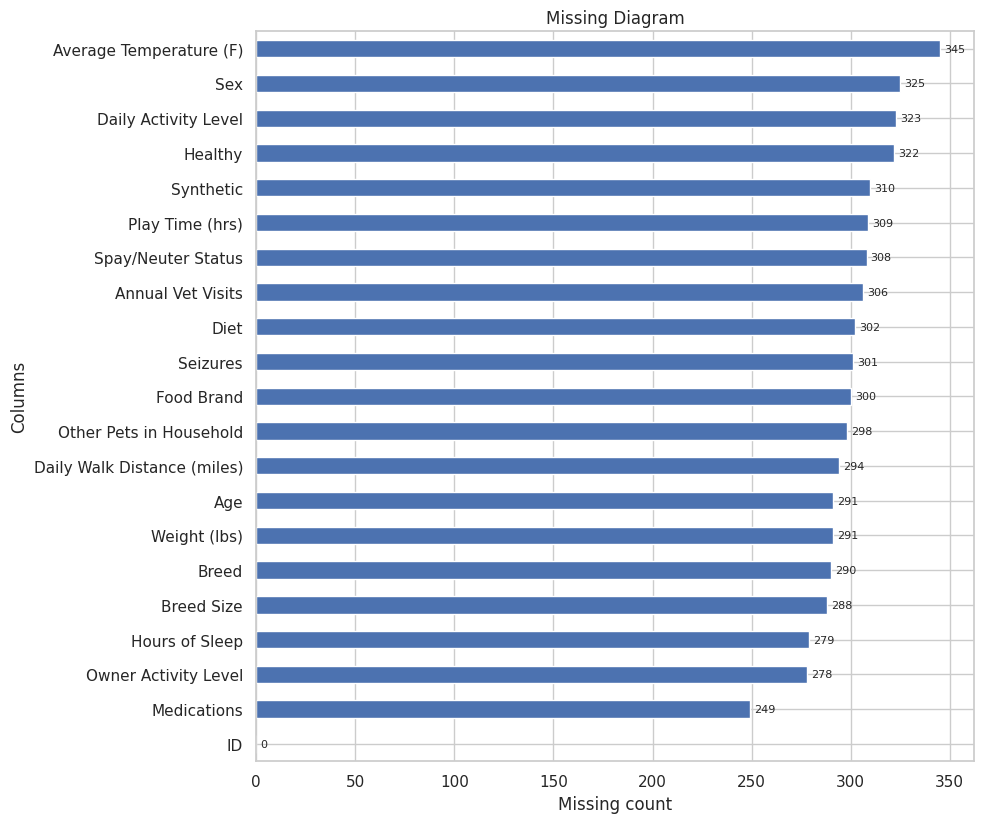

In [593]:
def missing_diagram(df):
    missing = df.isna().sum().sort_values(ascending=True)

    plt.figure(figsize=(10, 0.4 * len(missing)))
    ax = missing.plot(kind="barh")
    ax.set_title("Missing Diagram")
    ax.set_xlabel("Missing count")
    ax.set_ylabel("Columns")

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=3)

    plt.tight_layout()
    plt.show()
missing_diagram(df)


##**4. Trực quan hóa dữ liệu (Visualization)**

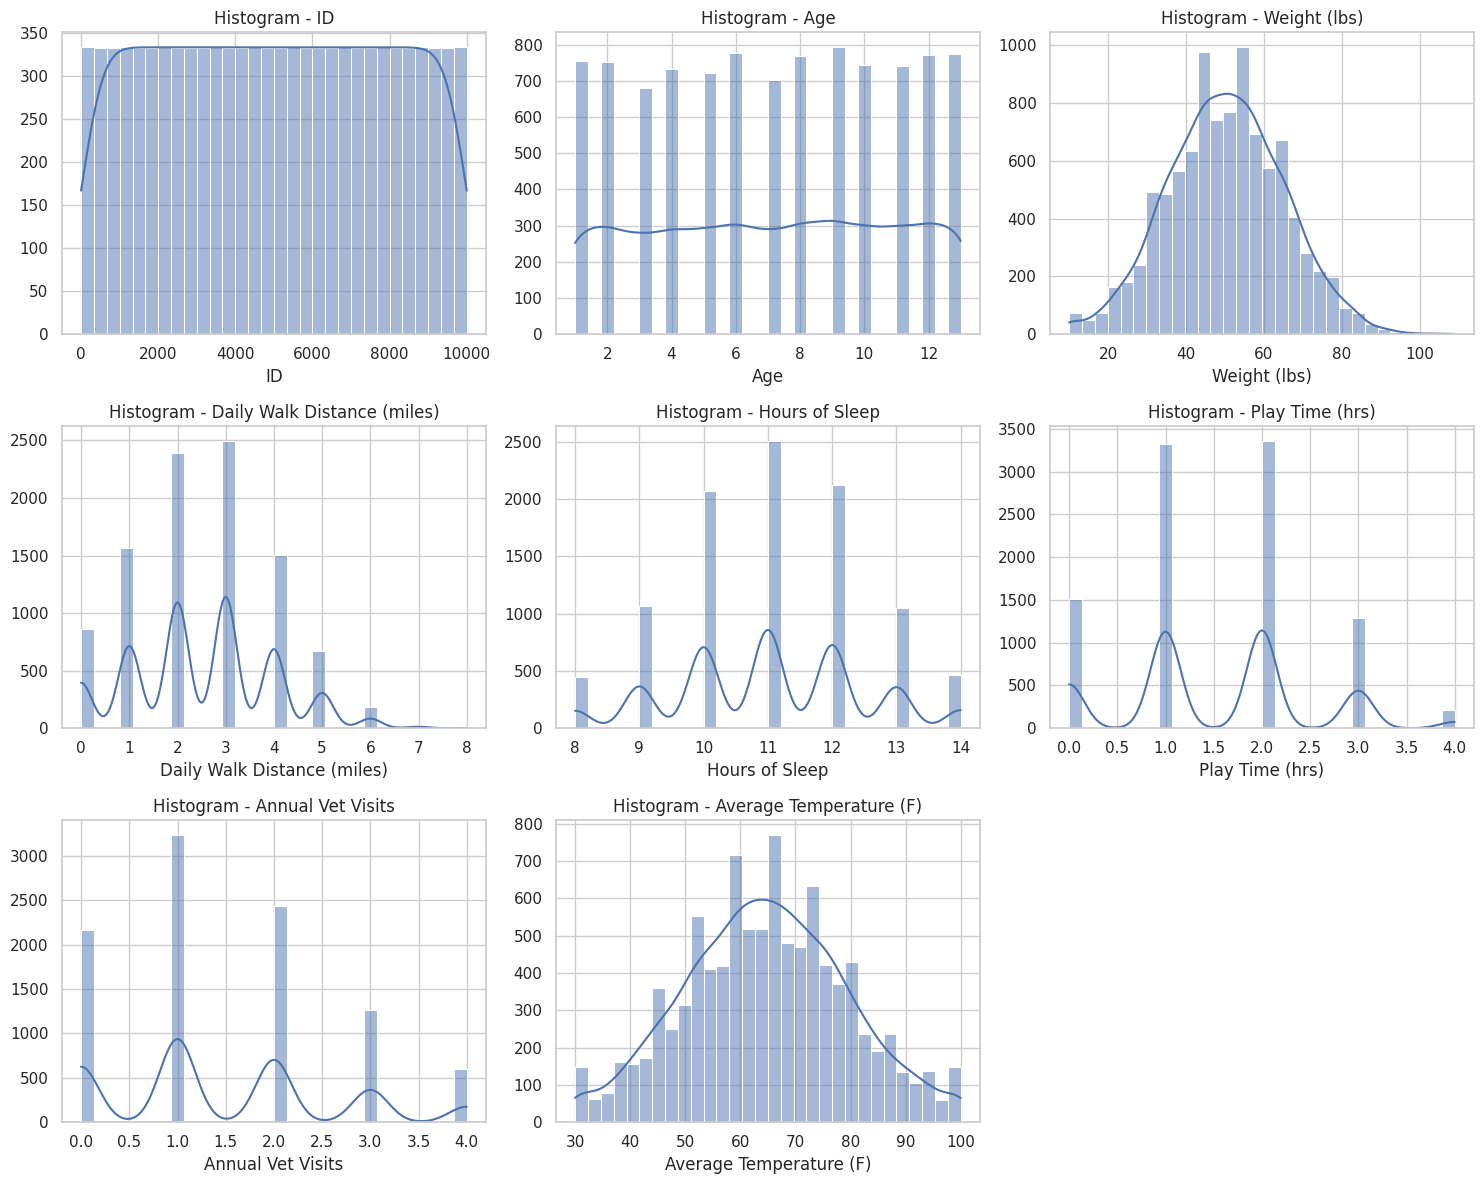

In [594]:
def numeric_hist(df, bins=30, ncols=3):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n = len(num_cols)
    nrows = int(np.ceil(n / ncols))

    plt.figure(figsize=(ncols*5, nrows*4))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, i)
        sns.histplot(df[col], kde=True, bins=bins)
        plt.title(f"Histogram - {col}")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()
numeric_hist(df)


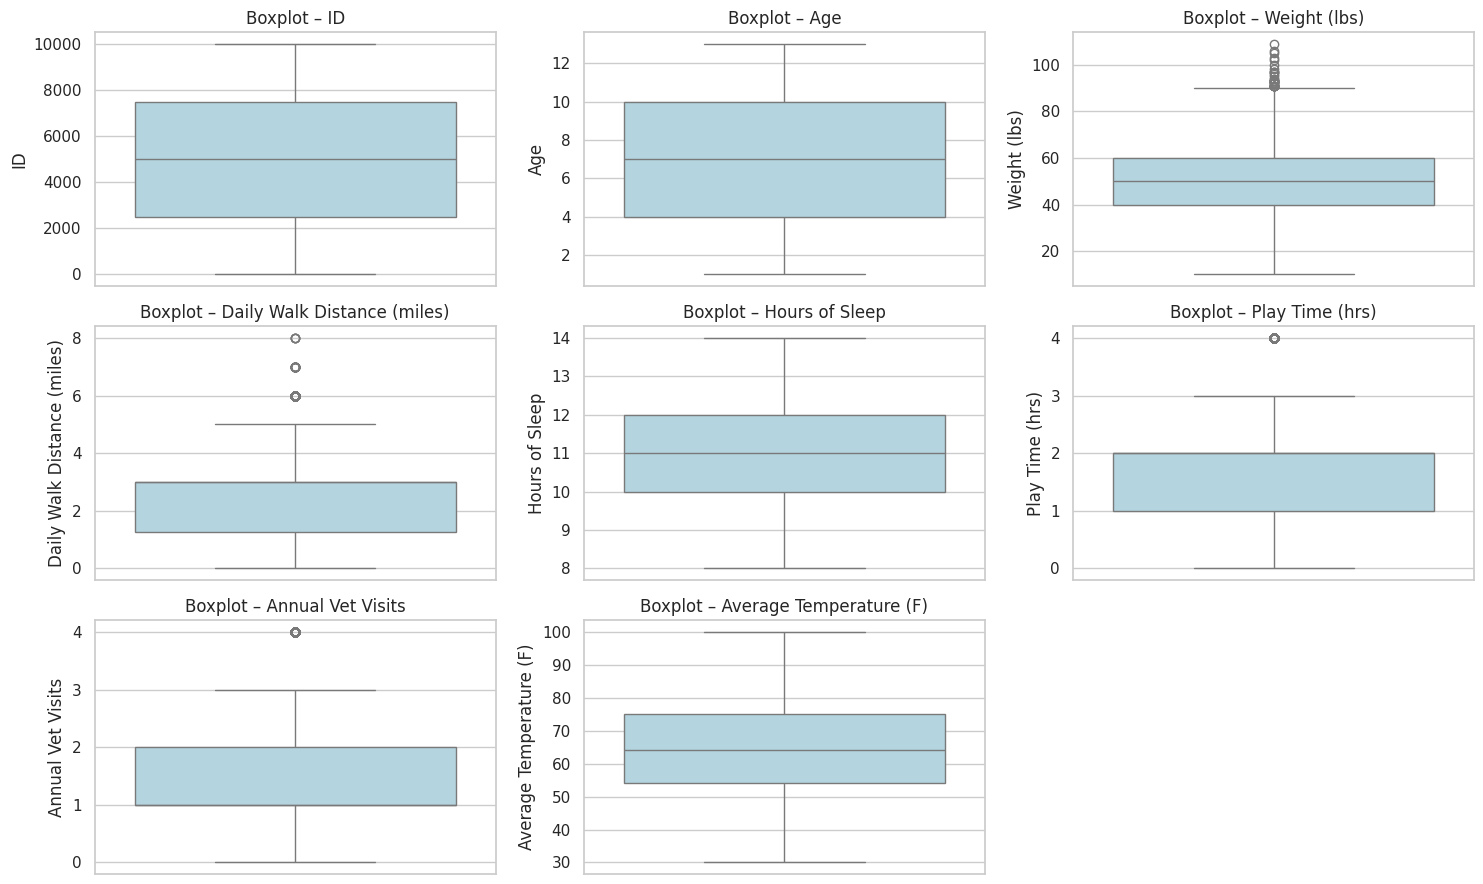

In [595]:
def numeric_boxplot(df, ncols=3):
    """Vẽ boxplot cho tất cả cột numeric với Seaborn"""
    num_cols = df.select_dtypes(include=[np.number]).columns
    n = len(num_cols); nrows = int(np.ceil(n/ncols))

    plt.figure(figsize=(ncols*5, nrows*3))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(y=df[col], color="lightblue")
        plt.ylabel(col); plt.xlabel("")
        plt.title(f"Boxplot – {col}")
    plt.tight_layout(); plt.show()
numeric_boxplot(df, ncols=3)


**Nhận xét**

- Ở biến Weight (lbs), khoảng tứ phân vị (IQR) nằm xung quanh 40–60 lbs, thể hiện phân bố chính của dữ liệu. Tuy nhiên, nhiều giá trị vượt quá ngưỡng Q3 + 1.5×IQR (trên 90 lbs) xuất hiện, tạo thành các ngoại lệ phía trên (upper outliers).

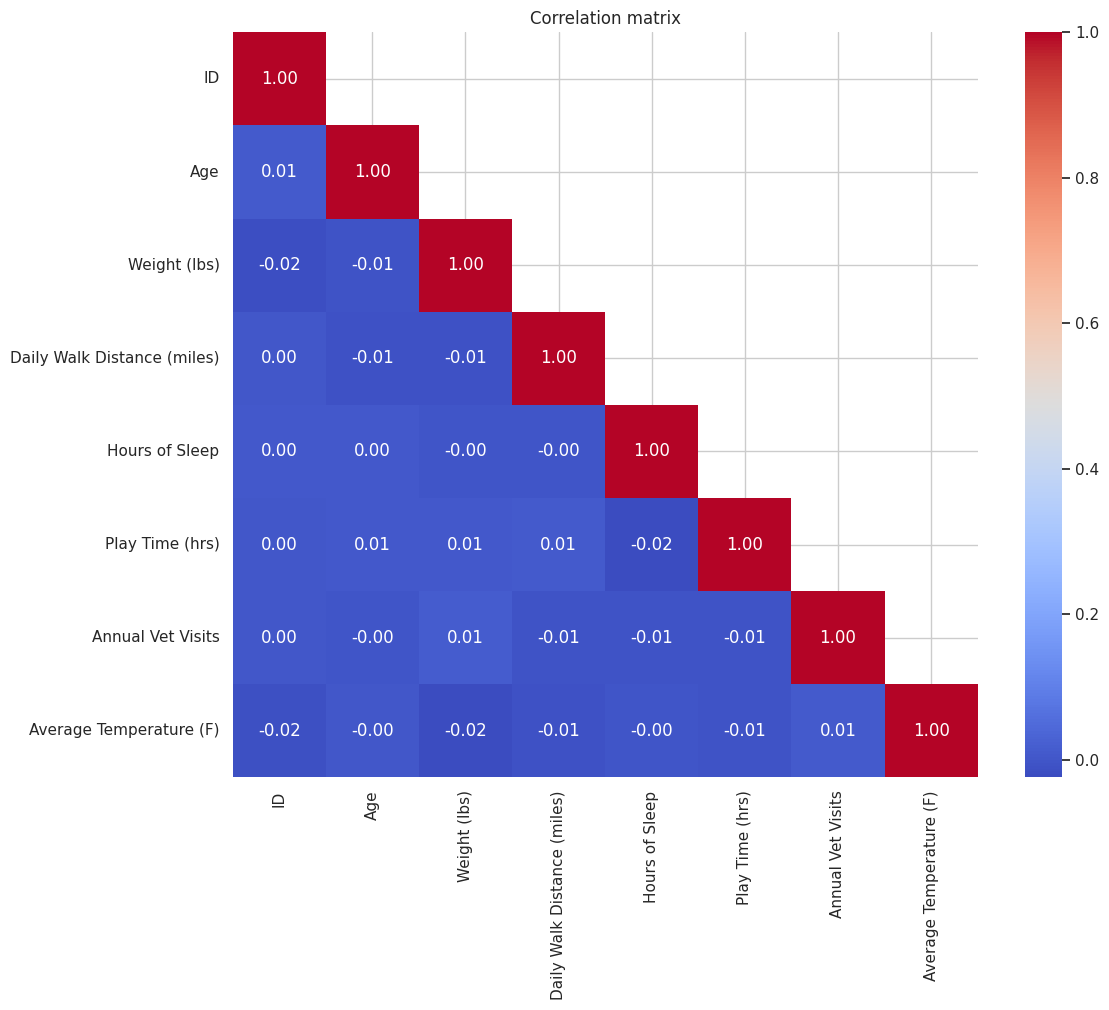

In [596]:
def cov_matrix(df, figsize=(10,8), cmap="coolwarm"):
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr()

    # Mask tam giác trên, giữ tam giác dưới + đường chéo
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr, annot=True, fmt=".2f",
        cmap=cmap, square=True,
        mask=mask
    )
    plt.title("Correlation matrix")
    plt.tight_layout()
    plt.show()

# Gọi thử
cov_matrix(df, figsize=(12,10))

**Nhận xét**

Ma trận tương quan chỉ ra rằng hầu hết các hệ số tương quan đều gần bằng 0, nghĩa là gần như không có mối liên hệ tuyến tính đáng kể giữa các biến. Điều này cho thấy các biến trong bộ dữ liệu khá độc lập với nhau, và không có cặp biến nào nổi bật với tương quan mạnh.

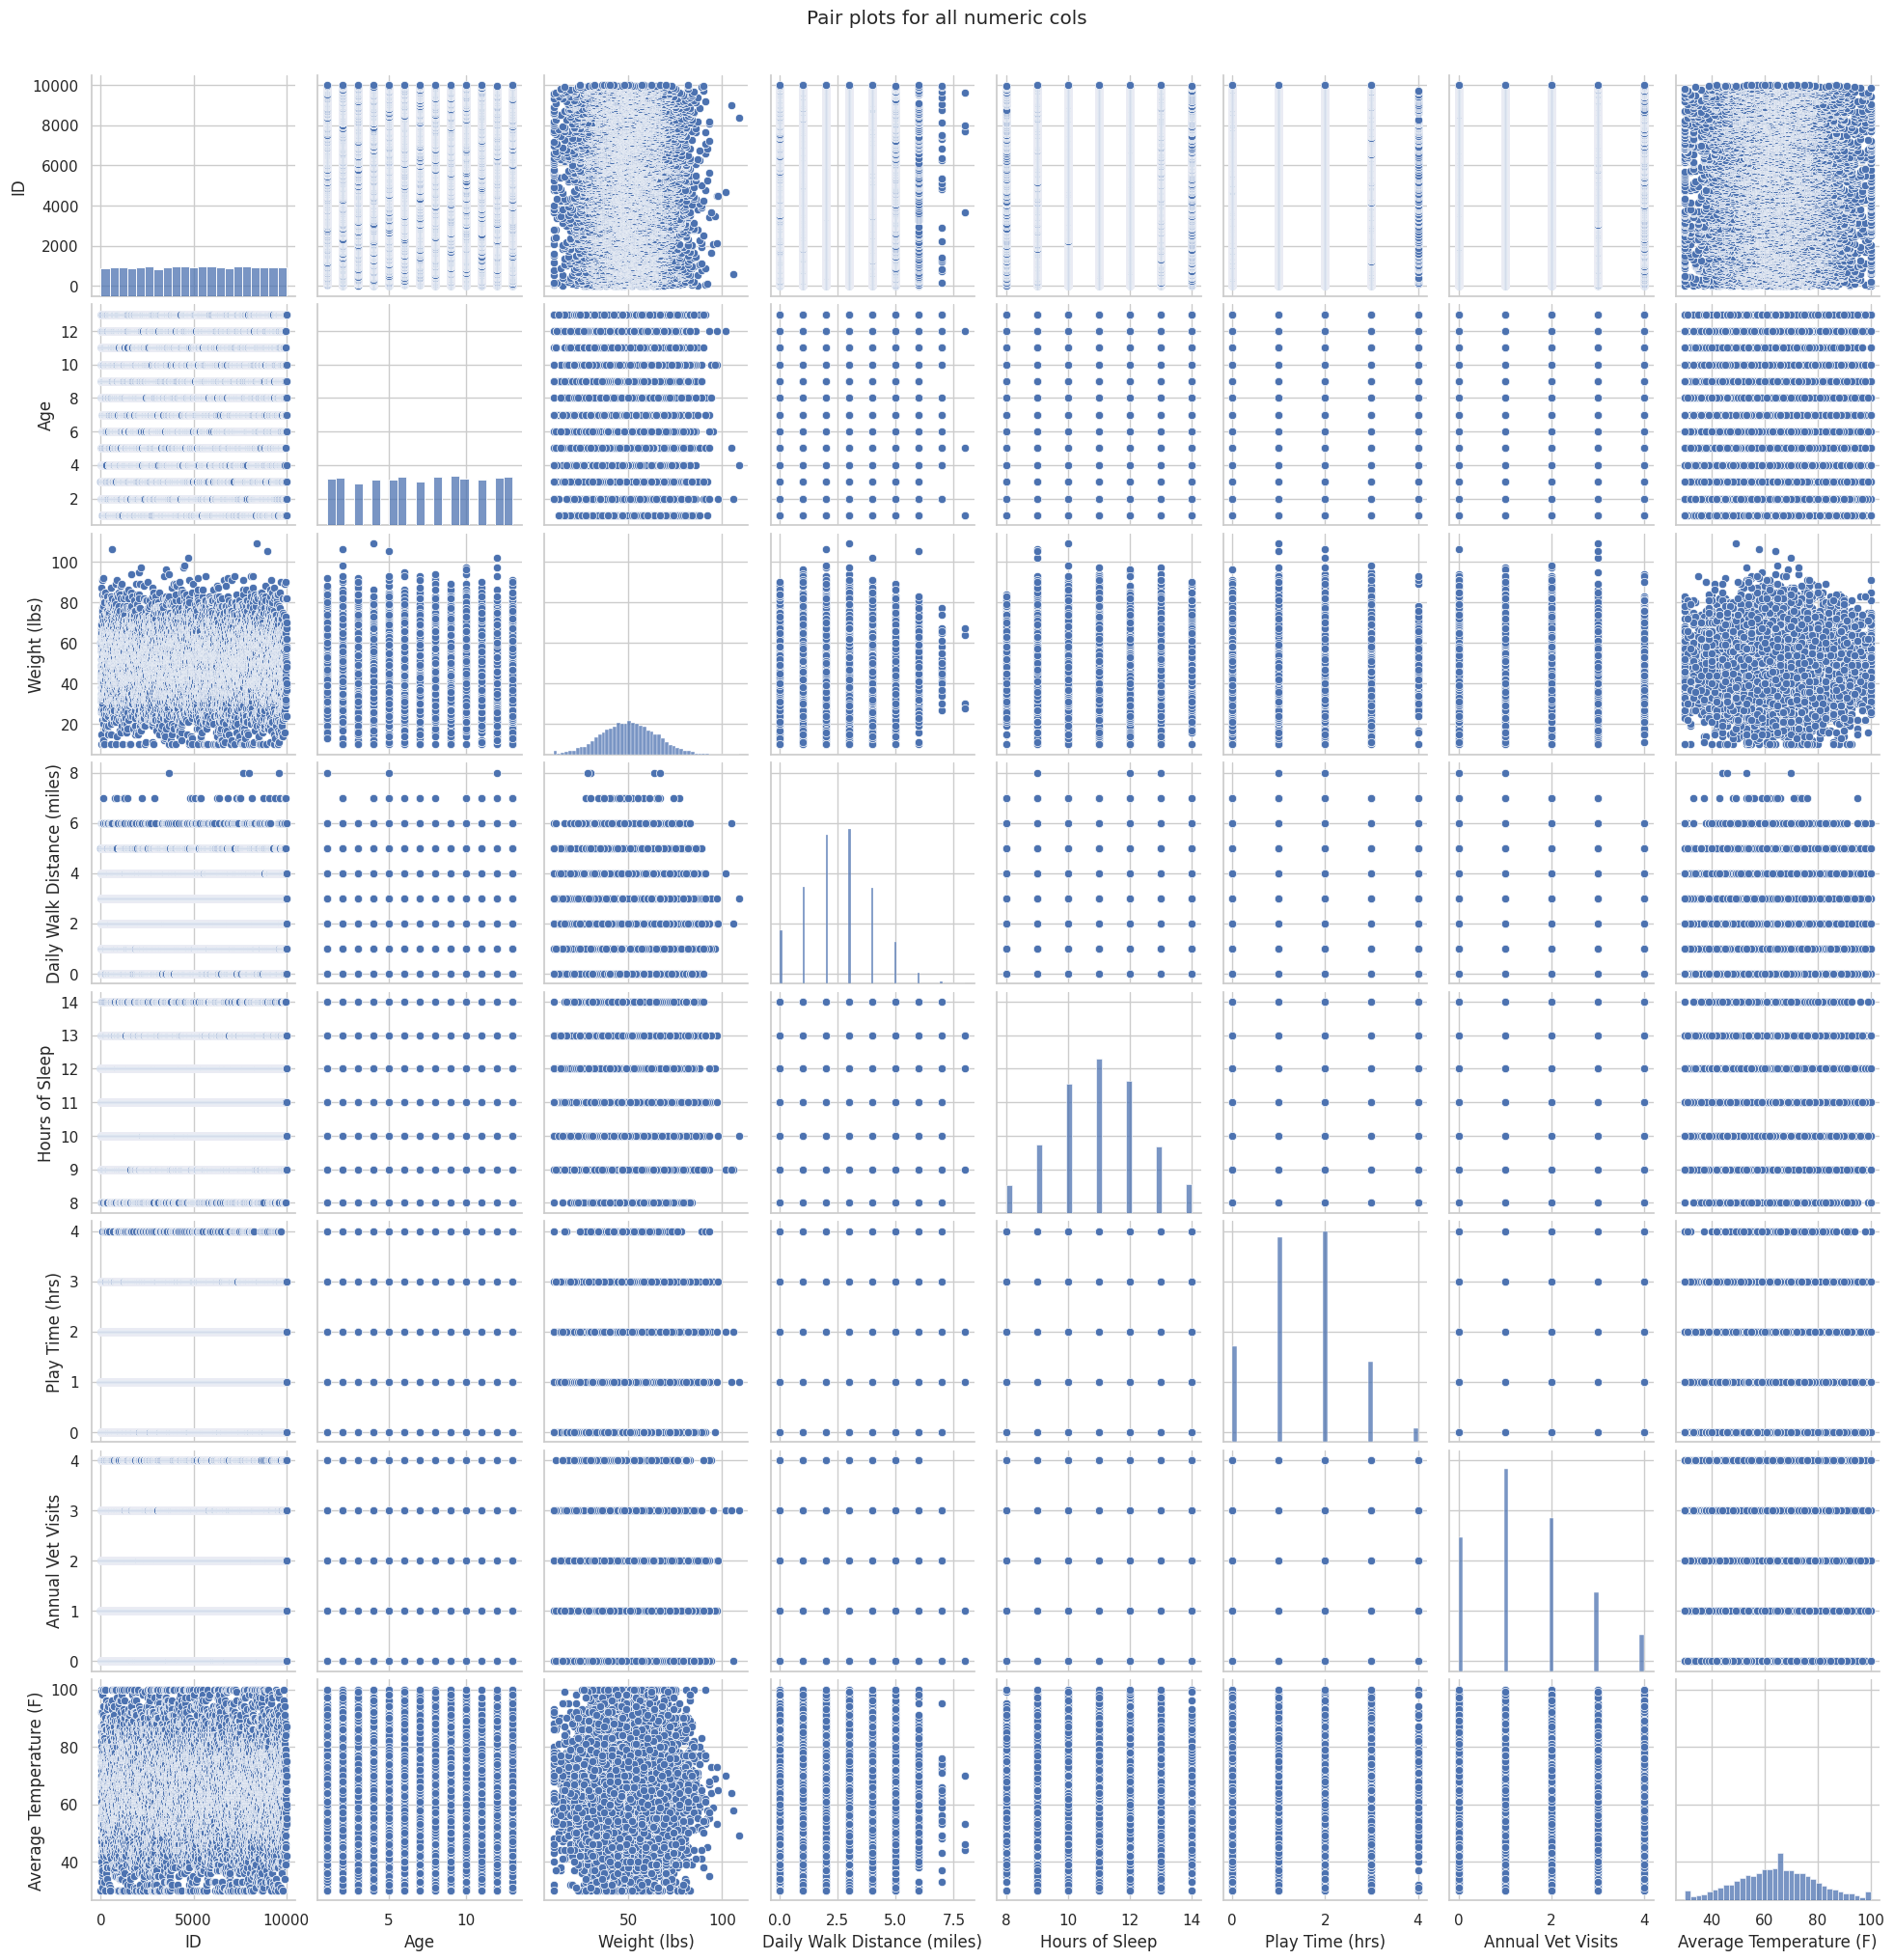

In [597]:
def numeric_pairplot(df, dropna=True, diag_kind="hist"):
    num_df = df.select_dtypes(include=["number"])
    if dropna:
        num_df = num_df.dropna()

    g = sns.pairplot(num_df, diag_kind=diag_kind)
    g.fig.suptitle("Pair plots for all numeric cols", y=1.02)
    plt.show()
numeric_pairplot(df)


##**5. Xu hướng phân phối**

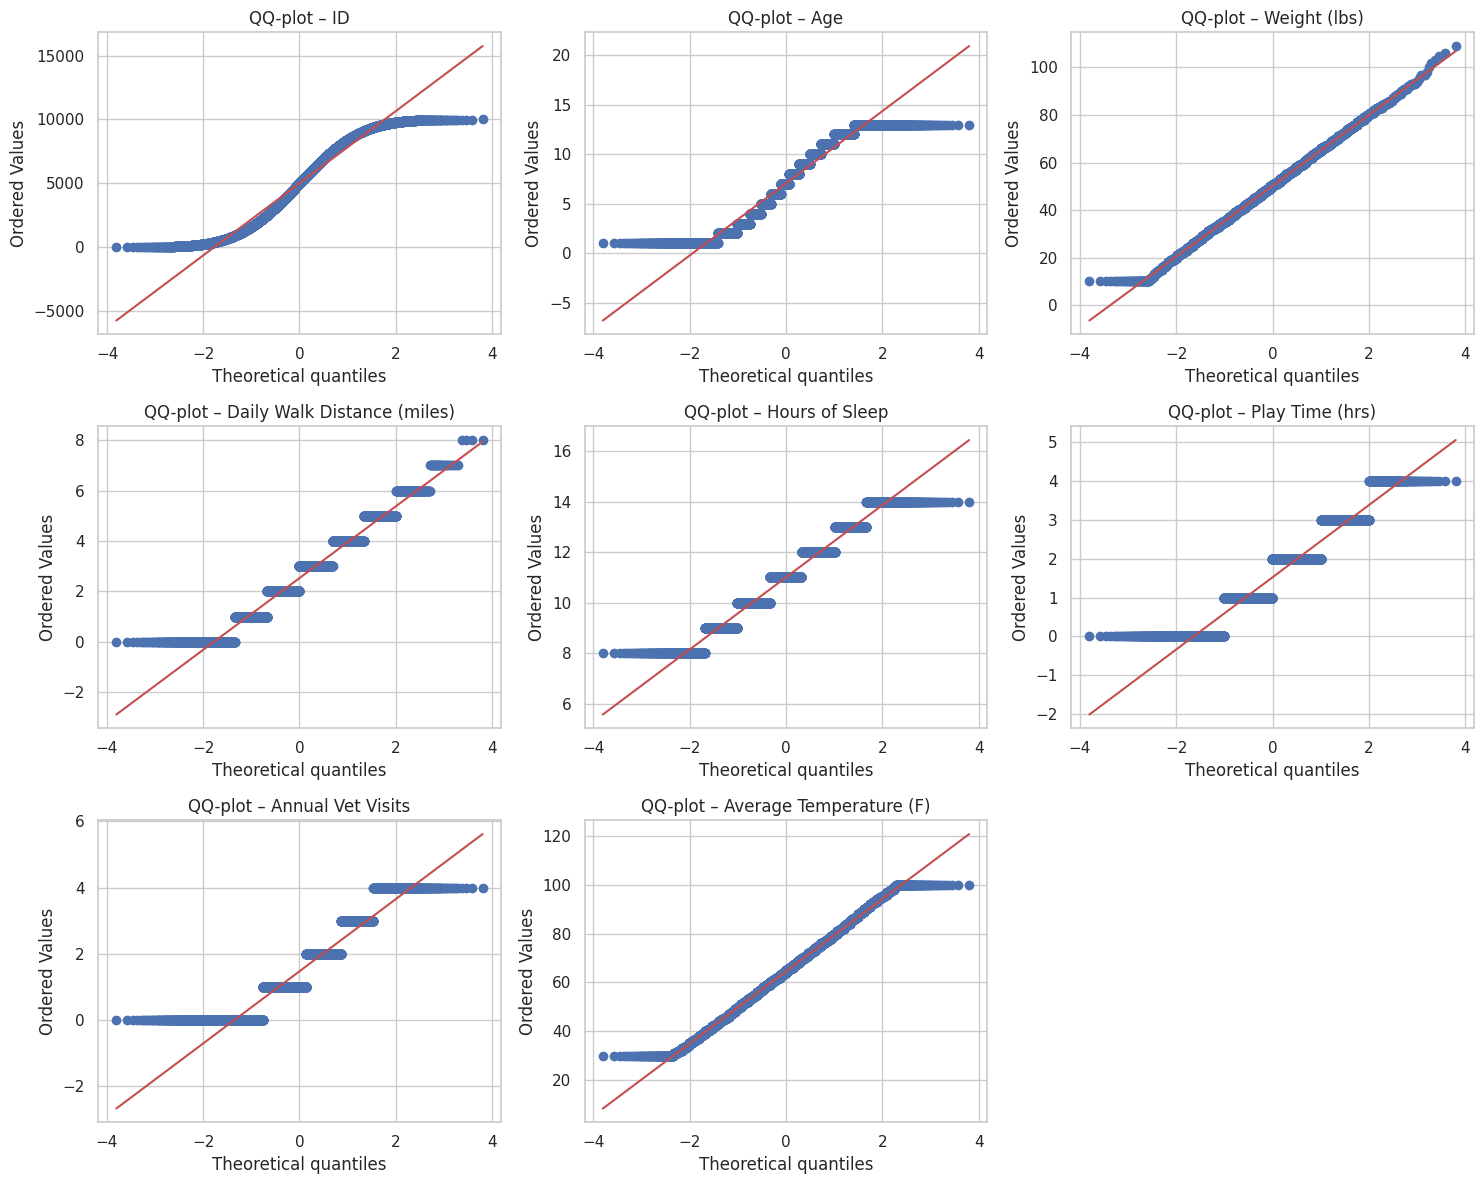

In [598]:
def numeric_qqplot(df, ncols=3):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n = len(num_cols); nrows = int(np.ceil(n/ncols))
    plt.figure(figsize=(ncols*5, nrows*4))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(nrows, ncols, i)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f"QQ-plot – {col}")
    plt.tight_layout(); plt.show()
numeric_qqplot(df)

**Nhận xét:**

* ID: đường cong lệch hoàn toàn khỏi đường chuẩn, bởi vì đây chỉ là biến định danh, không mang thông tin thống kê, cần loại bỏ.

* Age: các điểm dữ liệu xếp bậc thang và lệch ở hai đầu, biến rời rạc, không tuân theo phân phối chuẩn.

* Weight (lbs): bám sát đường chuẩn hơn so với các biến khác, tuy nhiên vẫn có sai lệch nhẹ ở đuôi, phân phối gần chuẩn nhưng chưa hoàn toàn.

* Daily Walk Distance (miles): dữ liệu dạng rời rạc, lệch nhẹ ở đầu đuôi, phân phối không chuẩn, nhưng còn xu hướng tuyến tính.

* Hours of Sleep: phân phối bậc thang, lệch rõ ở hai đầu, cho thấy dữ liệu rời rạc, xa chuẩn.

* Play Time (hrs): dữ liệu cũng theo dạng rời rạc, sai lệch nhẹ khỏi đường chuẩn.

* Annual Vet Visits: phần lớn tập trung ở giá trị nhỏ, tạo ra bậc thang và lệch đuôi, phân phối không chuẩn.

* Average Temperature (F): bám sát đường chuẩn hơn, sai lệch chủ yếu ở 2 đuôi, phân phối gần chuẩn.
* Kết luận: Chỉ có Weight và Average Temperature tương đối gần chuẩn, còn lại đều là biến rời rạc, lệch khỏi phân phối chuẩn

In [599]:
def check_normality(df, alpha=0.05):
    """Kiểm tra normality cho toàn bộ numeric columns"""
    num_cols = df.select_dtypes(include=[np.number]).columns
    results = []

    for col in num_cols:
        x = df[col].dropna()
        if len(x) < 3:
            continue

        skew = stats.skew(x)
        kurt = stats.kurtosis(x)

        # K2 test ? cái này không chuẩn lắm, kiểm định này để vào cho biết xem có tương đối k thôi
        stat, p = stats.normaltest(x)


        if abs(skew) <= 0.5 and abs(kurt) <= 1 and p > alpha:
            note = "Near normal"
        else:
            note = "Not normal"

        results.append([col, round(skew,3), round(kurt,3), round(p,4), note])

    table = pd.DataFrame(results, columns=["Column", "Skew", "Kurtosis", "D’Agostino and Pearson’s p test", "Conclusion"])
    return table
normality_table = check_normality(df)
display(normality_table)


,Column,Skew,Kurtosis,D’Agostino and Pearson’s p test,Conclusion
0,ID,0.000,-1.200,0.0000,Not normal
1,Age,-0.030,-1.210,0.0000,Not normal
2,Weight (lbs),0.017,-0.087,0.1598,Near normal
3,Daily Walk Distance (miles),0.204,-0.320,0.0000,Not normal
4,Hours of Sleep,-0.002,-0.498,0.0000,Not normal
5,Play Time (hrs),0.216,-0.450,0.0000,Not normal
6,Annual Vet Visits,0.490,-0.550,0.0000,Not normal
7,Average Temperature (F),0.040,-0.328,0.0000,Not normal


**Nhận xét:** Dựa vào Độ lệch (Skew) và Độ nhọn (Kurtosis) ta xác định được hình dạng của phân phối như sau:

Skew = 0: phân phối đối xứng → đồ thị cân bằng quanh trung bình.

Skew > 0 (lệch phải): đuôi bên phải dài hơn, nhiều giá trị nhỏ, một số giá trị lớn kéo phân phối lệch sang phải.

Skew < 0 (lệch trái): đuôi bên trái dài hơn, nhiều giá trị lớn, một số giá trị rất nhỏ kéo phân phối lệch sang trái.

Kurtosis = 0: phân phối gần chuẩn.

Kurtosis > 0: phân phối nhọn hơn chuẩn, tập trung nhiều quanh trung tâm, có nhiều giá trị ngoại lai (đuôi dày).

Kurtosis < 0: phân phối bẹt, dữ liệu dàn trải hơn, ít giá trị cực trị.
* Các biến số trong bộ dữ liệu nhìn chung (Trừ ID) có phân phối khá cân đối, với giá trị Skew đều xấp xỉ 0 hoặc lệch phải nhẹ, cho thấy dữ liệu không bị nghiêng nhiều về một phía. Tuy nhiên, tất cả các biến đều có Kurtosis âm, nghĩa là phân phối tương đối bẹt hơn chuẩn, ít giá trị cực trị và dữ liệu trải rộng hơn quanh trung bình. Biến Annual Vet Visits là đặc trưng lệch phải rõ rệt nhất, trong khi các biến khác gần như đối xứng

##**6. Phát hiện outlier**

In [600]:
def outliner_count_box(s):
    """Đếm số lượng outlier theo quy tắc boxplot (IQR 1.5)."""
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    count = 0
    for val in s.dropna():
        if val < low or val > up:
            count += 1
    return count

def outliner_count_zscore(s):
    """Đếm số lượng outlier theo quy tắc Z-score (3σ)."""
    mu = s.mean()
    sigma = s.std(ddof=0)
    low = mu - 3 * sigma
    up = mu + 3 * sigma
    count = 0
    for val in s.dropna():
        if val < low or val > up:
            count += 1
    return count

out_weight = outliner_count_zscore(df["Weight (lbs)"])
print(f"Số outlier (Z-score) cho Weight (lbs): {out_weight}")
for col in df.select_dtypes(include=[np.number]).columns:
    if col != "Weight (lbs)":
        out_count = outliner_count_box(df[col])
        print(f"Số outlier (Boxplot) cho {col}: {out_count}")


Số outlier (Z-score) cho Weight (lbs): 12
Số outlier (Boxplot) cho ID: 0
Số outlier (Boxplot) cho Age: 0
Số outlier (Boxplot) cho Daily Walk Distance (miles): 215
Số outlier (Boxplot) cho Hours of Sleep: 0
Số outlier (Boxplot) cho Play Time (hrs): 216
Số outlier (Boxplot) cho Annual Vet Visits: 604
Số outlier (Boxplot) cho Average Temperature (F): 0


**Nhận xét:**


Trong bước này, nhóm tiến hành phát hiện outlier bằng hai phương pháp: Z-score (3σ rule) và Boxplot (IQR 1.5 rule). Kết quả thu được như sau:

* Với biến Weight (lbs), phương pháp Z-score phát hiện 12 outlier. Đây là lựa chọn hợp lý vì cân nặng là biến liên tục, phân phối gần chuẩn (Skew ≈ 0, Kurtosis ≈ -0.09). Trong trường hợp này, dùng Z-score cho kết quả chính xác hơn so với IQR.

* Các biến khác được áp dụng Boxplot (IQR), phù hợp hơn cho dữ liệu rời rạc hoặc không chuẩn. Kết quả: Daily Walk Distance (215 outlier), Play Time (216 outlier), Annual Vet Visits (604 outlier), trong khi các biến ID, Age, Hours of Sleep và Average Temperature không có outlier đáng kể.

Việc sử dụng kết hợp cả hai cách giúp nhóm có cái nhìn toàn diện: Z-score mạnh khi dữ liệu gần chuẩn, còn Boxplot linh hoạt hơn cho các phân phối lệch hoặc rời rạc. Kết quả cho thấy một số biến hành vi (Daily Walk Distance, Play Time, Annual Vet Visits) có khá nhiều ngoại lệ, phản ánh sự đa dạng lớn giữa các cá thể chó trong tập dữ liệu.

# **II. Tiền xử lý dữ liệu**

## **1. Xử lí giá trị thiếu ở biến mục tiêu**

In [601]:
TARGET_COL = "Healthy"
print(f"Biến mục tiêu: {target_col}")
print(f"Số lượng giá trị thiếu ở cột mục tiêu: {df[target_col].isna().sum()} giá trị ({df[target_col].isna().mean()*100:.2f}%)")
df = df.dropna(subset=[target_col]).copy()
df_clone = df.copy()
print(f"Kích thước bộ dữ liệu sau khi xử lý missing: {df_clone.shape}")

Biến mục tiêu: Healthy
Số lượng giá trị thiếu ở cột mục tiêu: 322 giá trị (3.22%)
Kích thước bộ dữ liệu sau khi xử lý missing: (9678, 21)


**Nhận xét:**
* Để xử lý vấn đề giá trị thiếu ở biến mục tiêu Healthy, nhóm áp dụng phương pháp loại bỏ các hàng chứa giá trị bị thiếu trong cột này. Kết quả cho thấy có khoảng 3.22% mẫu dữ liệu bị thiếu nhãn, do đó số lượng mẫu đã giảm từ 10,000 xuống còn 9,678.  
* Mặc dù việc loại bỏ này sẽ làm cho dataset mất đi một phần nhỏ dữ liệu (~3%), nhưng nó đảm bảo rằng toàn bộ tập dữ liệu còn lại đều có nhãn đầy đủ và đáng tin cậy. Ngoài ra, việc giữ lại các giá trị thiếu nhãn này sẽ gây sai lệch trong khi huấn luyện mô hình.
* **Vậy tại sao không thực hiện impute như đối với các cột đặc trưng?** Bởi vì, mục tiêu của features là giữ lại thông tin càng nhiều càng tốt. Một vài giá trị ước lượng không làm sai bản chất quá nhiều. Nhưng target thì lại khác, về bản chất, target là nhãn thật đễ mô hình học, nếu ta điền khuyết bằng một giá trị giả định thì nhãn đó không phải thực tế, chỉ là giả định, dẫn đến mô hình học từ dữ liệu sai. Không những thế việc impute cho target sẽ làm méo phân phối, gây mất cân bằng mô hình.

* Sau khi xử lý, bộ dữ liệu này được coi là sạch ở biến mục tiêu và sẵn sàng cho các bước tiền xử lý tiếp theo.


## **2. Chia train set/ Test set**

In [602]:
X = df.drop(columns=[TARGET_COL, "ID"], errors="ignore")   # bỏ ID
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")

Train shape: (7742, 19) | Test shape: (1936, 19)


**Nhận xét:**
* Sau khi loại bỏ cột mục tiêu Healthy và cột mã số định danh ID, tập dữ liệu còn lại 19 đặc trưng để làm đầu vào mô hình. Nhóm tiến hành chia dữ liệu Train/Test theo tỉ lệ 80/20 với `stratify=y` để giữ nguyên tỉ lệ lớp giữa hai tập, và gieo seed cố định là 42 nhằm tái lập kết quả. Kết quả: Train shape = (7,742 × 19) và Test shape = (1,936 × 19) — phù hợp với tổng số 9,678 mẫu sau bước xử lý target thiếu trước đó.

* **Vì sao chia Train/Test trước các bước imputation và xử lý outlier?**  
  * Ngăn ngừa rò rỉ dữ liệu (Data leakage): Nếu bạn nhập các giá trị bị thiếu trước khi phân tách dữ liệu, bạn có nguy cơ đưa thông tin từ tập kiểm tra vào tập huấn luyện. Điều này có thể dẫn đến các số liệu hiệu suất quá lạc quan vì mô hình có thể học các mẫu không thực sự có trong dữ liệu chưa được biết đến.
  * Đánh giá mô hình thực tế hơn: Khi quy nạp sau khi phân tách, sẽ đảm bảo rằng mô hình quy nạp chỉ dựa trên dữ liệu huấn luyện. Điều này mô phỏng một tình huống thực tế khi mô hình gặp phải dữ liệu mới, chưa từng thấy.
  * Tóm lai, dữ liệu trong Train set và Test set phải độc lập với nhau, ta giả định rằng chưa biết bất cứ thông tin gì về tập Test, và các giá trị thiếu ở tập Test phải được suy ra từ việc impute tập Train trước sau đó mới áp dụng vào tập Test.

## **3. Xử lý giá trị thiếu**

In [603]:
def check_missing(df):
    miss_cnt = df.isna().sum()
    miss_pct = (miss_cnt / len(df) * 100).round(2)
    summary = pd.DataFrame({"Missing Count": miss_cnt,"Missing %": miss_pct})
    summary = summary[summary["Missing Count"] > 0].sort_values("Missing Count", ascending=False)
    if summary.empty:
        print("Không có missing values.")
    else:
        print("Có chứa missing ở các cột sau (top 5):")
        display(summary.head(5))


print("Train set:")
check_missing(X_train)

Train set:
Có chứa missing ở các cột sau (top 5):


,Missing Count,Missing %
Average Temperature (F),271,3.50
Daily Activity Level,261,3.37
Sex,248,3.20
Play Time (hrs),248,3.20
Annual Vet Visits,239,3.09


In [604]:
print("Test set:")
check_missing(X_test)

Test set:
Có chứa missing ở các cột sau (top 5):


,Missing Count,Missing %
Food Brand,79,4.08
Hours of Sleep,71,3.67
Sex,68,3.51
Synthetic,68,3.51
Spay/Neuter Status,67,3.46


In [605]:
# xử lí missing
def handle_missing(X_train, X_test, miss_thresh=0.30):
    # 3.1 – Tính tỉ lệ thiếu trên TRAIN, >30% thì drop
    miss_ratio = X_train.isna().mean().sort_values(ascending=False)
    drop_cols = miss_ratio[miss_ratio > miss_thresh].index.tolist()
    print(f"Cột sẽ loại bỏ: (> {miss_thresh*100:.0f}% missing trên Train test): {drop_cols if drop_cols else 'None'}")

    # 3.2 – Drop
    X_train = X_train.drop(columns=drop_cols, errors="ignore")
    X_test  = X_test.drop(columns=drop_cols,  errors="ignore")

    # 3.3 – Xác định lại nhóm cột
    num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # 3.4 – Impute - med cho numeric, mod cho cate
    num_imputer = None
    cat_imputer = None

    if num_cols:
        num_imputer = SimpleImputer(strategy="median")
        X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
        X_test[num_cols]  = num_imputer.transform(X_test[num_cols])
    if cat_cols:
        cat_imputer = SimpleImputer(strategy="most_frequent")
        X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
        X_test[cat_cols]  = cat_imputer.transform(X_test[cat_cols])

    print("\nXử lý Missing value: loại bỏ các cột missing lớn, "
          f"median cho numeric ({len(num_cols)} cột), mode cho categorical ({len(cat_cols)} cột)")

    return X_train, X_test, num_cols, cat_cols, num_imputer, cat_imputer

X_train, X_test, num_cols, cat_cols, num_imputer, cat_imputer = handle_missing(X_train, X_test, miss_thresh=0.3)


Cột sẽ loại bỏ: (> 30% missing trên Train test): None

Xử lý Missing value: loại bỏ các cột missing lớn, median cho numeric (7 cột), mode cho categorical (12 cột)


**Nhận xét:**  
* Khi kiểm tra dữ liệu, kết quả cho thấy ở tập Train có một số cột bị thiếu dữ liệu với tỷ lệ khoảng 3–3.5% (nhiều nhất là Average Temperature (F)), trong khi ở tập Test, cột thiếu nhiều nhất là Food Brand (4.08%), cùng một số cột khác như Hours of Sleep, Sex hay Spay/Neuter Status dao động quanh mức 3–3.6%.  
* Tuy nhiên, toàn bộ các cột đều có tỷ lệ thiếu nhỏ hơn ngưỡng 30% mà nhóm đặt ra (ngưỡng mà nhóm cho rằng nên loại bỏ đặc trưng đó), do đó không cần loại bỏ bất kỳ đặc trưng nào. Thay vì làm giảm số lượng feature, nhóm lựa chọn phương pháp điền khuyết (impute) để tận dụng tối đa thông tin hiện có.  
* Cụ thể, với các biến numeric, nhóm sử dụng giá trị median để thay thế giá trị bị thiếu. Việc chọn median thay vì mean là có chủ ý, bởi median ít nhạy cảm hơn với ngoại lai, giúp mô hình học ổn định và phản ánh phân phối trung tâm của dữ liệu tốt hơn. Với các biến categorical, nhóm áp dụng mode – tức giá trị xuất hiện nhiều nhất – để đảm bảo giữ lại nhãn phổ biến và hạn chế tạo ra nhiễu trong tập dữ liệu.  
* Nếu giữ nguyên các giá trị thiếu mà không xử lý, nhiều mô hình học máy sẽ không thể huấn luyện được (ví dụ như Logistic Regression, SVM), hoặc kết quả đánh giá sẽ sai lệch. Ngoài ra, nếu chọn cách loại bỏ toàn bộ các hàng chứa missing, tập dữ liệu sẽ bị giảm đáng kể kích thước, dẫn tới mất thông tin. Do đó, phương pháp impute là lựa chọn cân bằng và hợp lý trong trường hợp này.  
* Quan trọng hơn, các giá trị median/mode được tính toán hoàn toàn dựa trên tập Train rồi mới áp dụng sang Test. Cách làm này giúp ngăn chặn hiện tượng data leakage, đảm bảo rằng mô hình không vô tình học từ thông tin của Test set.  
* Sau khi xử lý, bộ dữ liệu không còn giá trị thiếu, vừa giữ lại đầy đủ số lượng đặc trưng, vừa đảm bảo tính toàn vẹn cho quá trình huấn luyện. Dataset giờ đã sẵn sàng cho các bước kế tiếp như phát hiện và xử lý outlier, chuẩn hóa và encoding.


## **4. Xử lý giá trị ngoại lai**

In [606]:
def iqr_handle_outlier(X_train, X_test, num_cols):
    iqr_bounds = {}
    for col in num_cols:
        q1 = X_train[col].quantile(0.25)
        q3 = X_train[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        iqr_bounds[col] = (low, high)

    for col, (low, high) in iqr_bounds.items():
        if col in X_train.columns:
            X_train[col] = np.clip(X_train[col], low, high)
        if col in X_test.columns:
            X_test[col] = np.clip(X_test[col], low, high)

    print("Outliers clipped bằng IQR (ngưỡng tính từ train, áp dụng cho cả train/test).")
    return X_train, X_test, iqr_bounds

X_train, X_test, iqr_bounds = iqr_handle_outlier(X_train, X_test, num_cols)


Outliers clipped bằng IQR (ngưỡng tính từ train, áp dụng cho cả train/test).


**Nhận xét:**  
* Sau khi xử lý giá trị thiếu, nhóm tiếp tục kiểm tra và xử lý các giá trị ngoại lai trong dữ liệu. Phương pháp được áp dụng là IQR – một cách phổ biến để phát hiện và giới hạn giá trị bất thường. Cụ thể, với mỗi cột numeric trong tập Train, nhóm tính toán Q1 (25%), Q3 (75%) và IQR = Q3 – Q1. Các ngưỡng cắt được xác định là [Q1 – 1.5×IQR, Q3 + 1.5×IQR].  
* Sau khi xác định ngưỡng, nhóm áp dụng phương pháp clipping: mọi giá trị vượt quá biên trên sẽ được thay bằng biên trên, mọi giá trị thấp hơn biên dưới sẽ được thay bằng biên dưới. Quá trình này được tính toán trên tập Train và áp dụng cho cả Train và Test nhằm đảm bảo không xảy ra hiện tượng data leakage.  
* So với việc loại bỏ hoàn toàn các hàng chứa ngoại lai, clipping giúp giữ lại toàn bộ số lượng mẫu (không làm giảm kích thước dataset), đồng thời giảm tác động tiêu cực của các giá trị cực đoan đến mô hình. Đây là một lựa chọn hợp lý trong bối cảnh dữ liệu chỉ có một tỷ lệ nhỏ giá trị bất thường.  
* Nếu không xử lý outlier, các mô hình nhạy cảm với khoảng cách và phân phối như Linear Regression hoặc SVM có thể bị ảnh hưởng mạnh, dẫn đến hệ số ước lượng bị méo hoặc ranh giới phân loại bị lệch. Ngược lại, việc clipping giúp dữ liệu trở nên ổn định hơn, hỗ trợ mô hình học được những mối quan hệ tổng quát thay vì bị chi phối bởi một số ít điểm cực trị.  

## **5. Scaling**

In [607]:
def scale_numeric(X_train, X_test, num_cols, method="standard"):
    if method == "standard":
        scaler = StandardScaler()
    elif method == "minmax":
        scaler = MinMaxScaler(feature_range=(0,1))
    else:
        raise ValueError("nhập lại.")
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols]  = scaler.transform(X_test[num_cols])
    print(f"\n Nhóm sử dụng phương pháp {'StandardScaler' if method=='standard' else 'MinMaxScaler'}.")
    print(" Đã scaling dữ liệu.")
    return X_train, X_test, scaler

X_train, X_test, scaler = scale_numeric(X_train, X_test, num_cols)






 Nhóm sử dụng phương pháp StandardScaler.
 Đã scaling dữ liệu.


**Nhận xét:**  
* Chuẩn hóa các biến numeric là việc làm để đưa các đặc trưng về cùng một thang đo. Phương pháp được lựa chọn là StandardScaler, trong đó mỗi giá trị được biến đổi dựa trên trung bình và độ lệch chuẩn của tập Train, đảm bảo sau chuẩn hóa dữ liệu có trung bình bằng 0 và độ lệch chuẩn bằng 1.  
* Bộ dữ liệu sức khỏe chó có nhiều đặc trưng numeric với thang đo rất khác nhau: tuổi tính bằng năm, cân nặng bằng pound, số giờ ngủ và chơi tính bằng giờ, quãng đường đi bộ tính bằng dặm, nhiệt độ trung bình theo độ F. Nếu giữ nguyên giá trị gốc, những biến có độ lớn tuyệt đối lớn (ví dụ cân nặng và nhiệt độ lên đến hàng chục) sẽ chi phối quá mức mô hình và làm giảm ảnh hưởng của các đặc trưng nhỏ hơn.  
* Việc chọn StandardScaler thay vì MinMaxScaler là hợp lý bởi dữ liệu sau clipping vẫn có phân phối trải rộng và có khả năng tồn tại ngoại lai nhẹ. StandardScaler ít nhạy cảm với outlier hơn và giữ được khoảng cách tương đối giữa các điểm dữ liệu, giúp mô hình học được mối quan hệ ổn định hơn.  
* Nếu dùng MinMaxScaler, toàn bộ dữ liệu sẽ bị nén vào khoảng [0,1], dễ bị méo khi xuất hiện giá trị bất thường mới. Trong khi đó, StandardScaler phù hợp hơn cho các mô hình mà nhóm triển khai như Logistic Regression, SVM, và MLP – những mô hình nhạy cảm với phân phối và độ lớn của dữ liệu.  


In [608]:
def encode(X_train, X_test, cat_cols):
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

    X_train_cat = pd.DataFrame(
        encoder.fit_transform(X_train[cat_cols]),
        columns=encoder.get_feature_names_out(cat_cols),
        index=X_train.index
    )
    X_test_cat = pd.DataFrame(
        encoder.transform(X_test[cat_cols]),
        columns=encoder.get_feature_names_out(cat_cols),
        index=X_test.index
    )

    X_train_enc = pd.concat([X_train.drop(columns=cat_cols), X_train_cat], axis=1)
    X_test_enc = pd.concat([X_test.drop(columns=cat_cols), X_test_cat], axis=1)
    print("One-hot encoding các cột categorical: ")
    print(f"Kết quả: Từ {len(cat_cols)} cột ban đầu trở thành {X_train_cat.shape[1]} cột mới")

    return X_train_enc, X_test_enc, encoder
X_train, X_test, encoder = encode(X_train, X_test, cat_cols)


One-hot encoding các cột categorical: 
Kết quả: Từ 12 cột ban đầu trở thành 53 cột mới


**Nhận xét:** Các biến categorical đã được chuyển đổi bằng One-Hot Encoding. Kết quả: từ 12 cột ban đầu mở rộng thành 53 cột mới, giúp mô hình hiểu đúng đặc trưng phân loại nhưng cũng làm tăng số chiều dữ liệu.

## **6. Giảm chiều dữ liệu**

Từ ma trận tương quan, và kết quả trích xuất đặc trưng. Những đặc trưng còn lại đều có tương quan rất thấp với nhau đôi một. Điều đó có nghĩa là mỗi đặc trưng đều chứa thông tin quan trọng trong huấn luyên. Việc

# **III. Trích xuất và lựa chọn đặc trưng**

In [609]:
from sklearn.feature_selection import VarianceThreshold

def feature_filler(X_train, X_test, threshold=0.0, corr_limit=0.95):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X_train)

    selected_cols = X_train.columns[selector.get_support()]
    X_train = pd.DataFrame(selector.transform(X_train), columns=selected_cols, index=X_train.index)
    X_test  = pd.DataFrame(selector.transform(X_test),  columns=selected_cols, index=X_test.index)
    print(f"Sau khi loại bỏ cột constant hoặc near-constant: Giữ lại {X_train.shape[1]} features ")

    # đa cộng tuyến, tương quan cao thì bỏ
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [col for col in upper.columns if any(upper[col] > corr_limit)]
    print(f"Loại bỏ {len(to_drop)} đặc trưng có tương quan cao: {to_drop}")

    X_train = X_train.drop(columns=to_drop)
    X_test  = X_test.drop(columns=to_drop)

    print("\nHoàn thành trích xuất, lựa chọn đặc trưng.")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

    return X_train, X_test, to_drop
X_train, X_test, dropped = feature_filler(X_train, X_test, threshold=0.0, corr_limit=0.95)


Sau khi loại bỏ cột constant hoặc near-constant: Giữ lại 59 features 
Loại bỏ 4 đặc trưng có tương quan cao: ['Sex_Male', 'Other Pets in Household_Yes', 'Medications_Yes', 'Seizures_Yes']

Hoàn thành trích xuất, lựa chọn đặc trưng.
Train shape: (7742, 55), Test shape: (1936, 55)


**Nhận xét:**
Ở đây, nhóm sẽ loại bỏ đi các cột chỉ có 1 giá trị hoàn toàn giống nhau hoặc gần như vậy. Ngoài ra , loại bỏ các cột có khả năng gây ra đa cộng tuyến và các cột có tương quan cao (>95%)

# **IV. Huấn luyện mô hình**

In [610]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# SVM
svm_clf = SVC(kernel="rbf", probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


# **V. Đánh giá mô hình**

## **1. Pipeline truyền thống**

In [611]:
# log_reg, svm_clf, rf
models = {
    "Logistic Regression": log_reg,
    "SVM (RBF)": svm_clf,
    "Random Forest": rf
}

classes = np.unique(y_test)
pos_label = np.max(classes)  # coi lớp lớn hơn là "positive"
y_true_bin_test = (y_test == pos_label).astype(int)

def get_scores(model, X):
    """Trả về score liên tục cho ROC/PR (proba[:,1] nếu có,
    nếu không có thì dùng decision_function)."""
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)
        if proba.shape[1] == 2:
            return proba[:, 1]
        # Nếu (hiếm) >2 lớp, lấy max proba như một score tổng quát
        return proba.max(axis=1)
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        return s if s.ndim == 1 else s.max(axis=1)
    return None

Đoạn code trên chuẩn bị các hàm và chỉ số đánh giá (accuracy, precision, recall, F1, ROC-AUC, PR-AUC, confusion matrix).  
Ba mô hình Logistic Regression, SVM và Random Forest được đưa vào dictionary để dễ quản lý.  
Hàm `get_scores` được xây dựng nhằm lấy ra giá trị dự đoán liên tục (probability hoặc decision function) để vẽ ROC/PR, đảm bảo dùng được cho cả mô hình nhị phân và đa lớp.


In [612]:

# 2) ĐÁNH GIÁ TRÊN TEST SET
rows = []
roc_curves = {}
pr_curves = {}
cms = {}
auc_store = {}

for name, model in models.items():
    # Dự đoán label
    y_pred = model.predict(X_test)
    y_pred_bin = (y_pred == pos_label).astype(int)

    # Điểm liên tục cho ROC/PR
    y_score = get_scores(model, X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_true_bin_test, y_pred_bin, zero_division=0)
    rec = recall_score(y_true_bin_test, y_pred_bin, zero_division=0)
    f1 = f1_score(y_true_bin_test, y_pred_bin, zero_division=0)

    # AUC
    roc_auc = np.nan
    pr_auc = np.nan
    if y_score is not None:
        roc_auc = roc_auc_score(y_true_bin_test, y_score)
        pr_auc = average_precision_score(y_true_bin_test, y_score)
        fpr, tpr, _ = roc_curve(y_true_bin_test, y_score)
        prec_curve, rec_curve, _ = precision_recall_curve(y_true_bin_test, y_score)
        roc_curves[name] = (fpr, tpr)
        pr_curves[name] = (rec_curve, prec_curve)
        auc_store[name] = (roc_auc, pr_auc)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    cms[name] = cm

    rows.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    })

results_test = pd.DataFrame(rows).sort_values("F1", ascending=False)
print("=== So sánh trên TEST SET ===")
display(results_test)

# In classification_report cho từng model
for name, model in models.items():
    print(f"\n{name} - classification_report:")
    print(classification_report(y_test, model.predict(X_test), digits=3))


=== So sánh trên TEST SET ===


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,PR-AUC
2,Random Forest,0.931818,0.925033,0.988162,0.955556,0.977894,0.991582
1,SVM (RBF),0.923554,0.926490,0.974234,0.949762,0.969064,0.988841
0,Logistic Regression,0.879649,0.907797,0.932451,0.919959,0.935772,0.974859



Logistic Regression - classification_report:
              precision    recall  f1-score   support

          No      0.790     0.728     0.758       500
         Yes      0.908     0.932     0.920      1436

    accuracy                          0.880      1936
   macro avg      0.849     0.830     0.839      1936
weighted avg      0.877     0.880     0.878      1936


SVM (RBF) - classification_report:
              precision    recall  f1-score   support

          No      0.913     0.778     0.840       500
         Yes      0.926     0.974     0.950      1436

    accuracy                          0.924      1936
   macro avg      0.920     0.876     0.895      1936
weighted avg      0.923     0.924     0.921      1936


Random Forest - classification_report:
              precision    recall  f1-score   support

          No      0.958     0.770     0.854       500
         Yes      0.925     0.988     0.956      1436

    accuracy                          0.932      1936
   mac

Trên tập TEST, cả ba mô hình đều đạt hiệu suất cao nhưng có sự khác biệt rõ rệt.  
- **Random Forest** cho kết quả tốt nhất, đạt cân bằng gần như hoàn hảo giữa precision và recall, với ROC-AUC và PR-AUC cao nhất.  
- **SVM (RBF)** cũng thể hiện rất mạnh, đặc biệt ở recall, giúp giảm thiểu bỏ sót mẫu dương tính.  
- **Logistic Regression** kém hơn hai mô hình còn lại, nhất là ở recall, nhưng vẫn giữ được ưu điểm dễ diễn giải nhờ hệ số đặc trưng.  




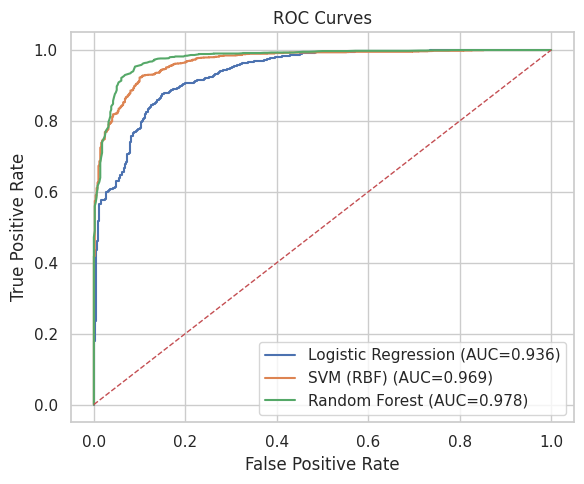

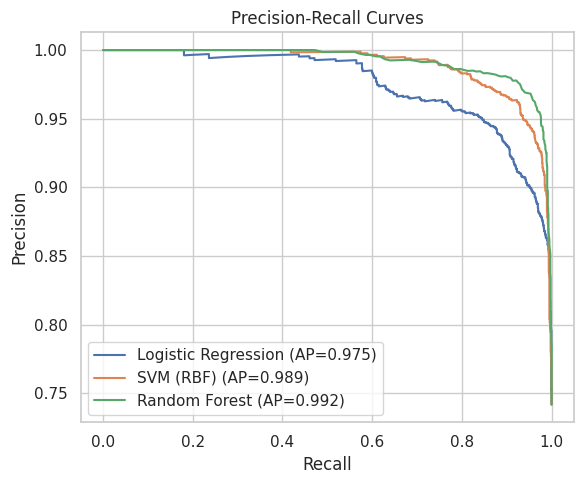

In [613]:
# 3) VIZ: ROC & PR CURVE
plt.figure(figsize=(6,5))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = auc_store.get(name, (np.nan, np.nan))[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves"); plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
for name, (rec, prec) in pr_curves.items():
    ap = auc_store.get(name, (np.nan, np.nan))[1]
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curves"); plt.legend(); plt.tight_layout()
plt.show()


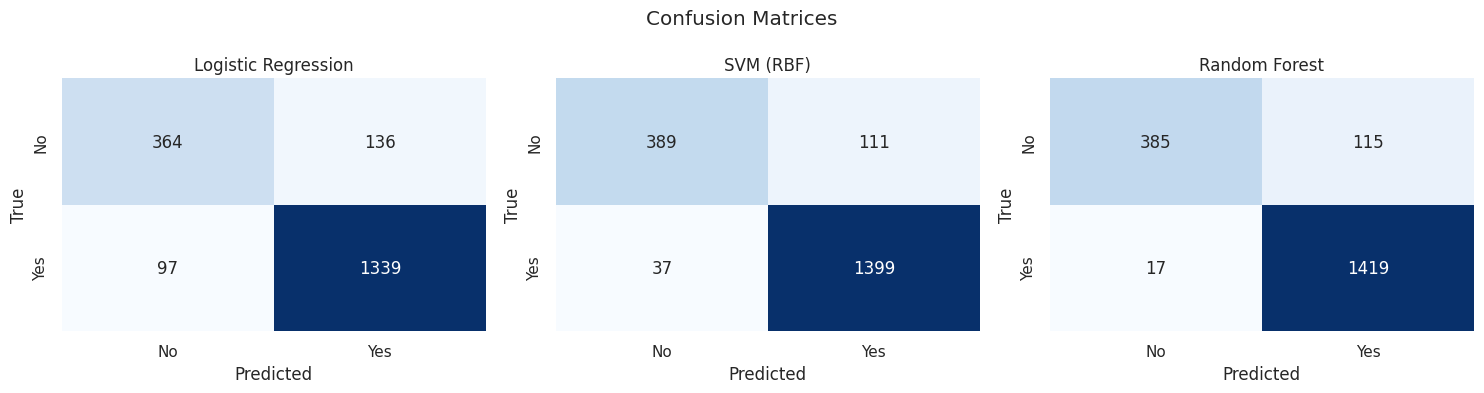

In [614]:
# 4) VIZ: CONFUSION MATRICES
fig, axes = plt.subplots(1, len(models), figsize=(15,4))
if len(models) == 1:
    axes = [axes]
for ax, (name, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=ax,
                xticklabels=classes, yticklabels=classes, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel("Predicted"); ax.set_ylabel("True")
plt.suptitle("Confusion Matrices")
plt.tight_layout()
plt.show()


In [615]:
# 5) CROSS-VALIDATION (5-FOLD)
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)
y_all_bin = (y_all == pos_label).astype(int)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_means(model, X, y_bin):
    # cross_validate sẽ clone model và fit từng fold
    scoring = {
        "acc": "accuracy",
        "f1": "f1",
        "roc_auc": "roc_auc",
        "pr_auc": "average_precision"
    }
    out = cross_validate(clone(model), X, y_bin, cv=cv, scoring=scoring, n_jobs=-1)
    return {
        "Accuracy": out["test_acc"].mean(),
        "F1":       out["test_f1"].mean(),
        "ROC-AUC":  out["test_roc_auc"].mean(),
        "PR-AUC":   out["test_pr_auc"].mean(),
    }

cv_rows = []
for name, model in models.items():
    m = cv_means(model, X_all, y_all_bin)
    m["Model"] = name
    cv_rows.append(m)

results_cv = (
    pd.DataFrame(cv_rows)
      .set_index("Model")
      .sort_values("F1", ascending=False)
)

print("=== So sánh qua 5-fold CV (mean only) ===")
display(results_cv.round(3))


=== So sánh qua 5-fold CV (mean only) ===


,Accuracy,F1,ROC-AUC,PR-AUC
Model,,,,
Random Forest,0.933,0.956,0.979,0.992
SVM (RBF),0.925,0.951,0.970,0.989
Logistic Regression,0.885,0.923,0.937,0.976


## **2. Pipeline học sâu (MLP)**

In [616]:
def train_evaluate_nn(X_train, X_test, y_train, y_test, HP, random_state=42, verbose=0):

    # Encode nhãn nếu cần
    if y_train.dtype == 'O' or str(y_train.dtype).startswith('category'):
        lab = LabelEncoder()
        y_train_bin = lab.fit_transform(y_train)
        y_test_bin  = lab.transform(y_test)
    else:
        y_train_bin = y_train.values if hasattr(y_train, "values") else y_train
        y_test_bin  = y_test.values if hasattr(y_test, "values") else y_test

    # Train/val split
    X_tr, X_val, y_tr, y_val = train_test_split(
        X_train.values if hasattr(X_train, "values") else X_train,
        y_train_bin,
        test_size=0.15,
        stratify=y_train_bin,
        random_state=random_state
    )
    X_te = X_test.values if hasattr(X_test, "values") else X_test

    # Build model
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_tr.shape[1],)))
    model.add(layers.BatchNormalization())

    for h, d in zip(HP["hidden"], HP["dropout"]):
        model.add(layers.Dense(h, activation="relu"))
        model.add(layers.Dropout(d))

    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=HP["lr"]),
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="roc_auc"),
                 keras.metrics.Precision(),
                 keras.metrics.Recall()]
    )

    # Callbacks
    cb = [
        keras.callbacks.EarlyStopping(
            patience=HP["patience"], restore_best_weights=True,
            monitor="val_roc_auc", mode="max"
        ),
        keras.callbacks.ReduceLROnPlateau(
            patience=5, factor=0.5, monitor="val_loss"
        )
    ]

    # Fit
    hist = model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=HP["epochs"],
        batch_size=HP["batch"],
        callbacks=cb,
        verbose=verbose
    )

    # Predict test
    y_score = model.predict(X_te, verbose=0).ravel()
    y_hat = (y_score >= 0.5).astype(int)

    # Metrics
    metrics = {
        "hidden": HP["hidden"],
        "dropout": HP["dropout"],
        "lr": HP["lr"],
        "batch": HP["batch"],
        "epochs": HP["epochs"],
        "Accuracy": accuracy_score(y_test_bin, y_hat),
        "F1": f1_score(y_test_bin, y_hat),
        "ROC-AUC": roc_auc_score(y_test_bin, y_score),
        "PR-AUC": average_precision_score(y_test_bin, y_score),
        "MAE": mean_absolute_error(y_test_bin, y_score),
        "MSE": mean_squared_error(y_test_bin, y_score),
        "R2": r2_score(y_test_bin, y_score)
    }

    results_df = pd.DataFrame([metrics])
    return model, results_df

hp_list = [
    # Nhỏ nhất
    {
        "hidden": (32,),
        "dropout": (0.2,),
        "lr": 1e-3,
        "batch": 128,
        "epochs": 80,
        "patience": 8
    },
    # Trung bình nhỏ
    {
        "hidden": (64, 32),
        "dropout": (0.3, 0.2),
        "lr": 1e-3,
        "batch": 128,
        "epochs": 100,
        "patience": 10
    },
    # Trung bình
    {
        "hidden": (128, 64),
        "dropout": (0.3, 0.3),
        "lr": 5e-4,
        "batch": 256,
        "epochs": 120,
        "patience": 12
    }
]

all_results = []
for HP in hp_list:
    model, res = train_evaluate_nn(X_train, X_test, y_train, y_test, HP, verbose=0)
    all_results.append(res)

results_df = pd.concat(all_results, ignore_index=True)
display(results_df)

,hidden,dropout,lr,batch,epochs,Accuracy,F1,ROC-AUC,PR-AUC,MAE,MSE,R2
0,"(32,)","(0.2,)",0.0010,128,80,0.925620,0.950853,0.964015,0.986353,0.121554,0.059606,0.688843
1,"(64, 32)","(0.3, 0.2)",0.0010,128,100,0.923554,0.949523,0.964320,0.986577,0.109789,0.058402,0.695128
2,"(128, 64)","(0.3, 0.3)",0.0005,256,120,0.912707,0.941664,0.958421,0.984481,0.128085,0.066398,0.653392


**Nhận xét:**
Nhìn chung, độ chính xác của mô hình MLP, với các siêu tham số đã thử thì đều tốt hơn 3 mô hình truyền thống.

## **3. Đánh giá 4 mô hình khi sử dụng PCA**

In [617]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=None, solver="lbfgs"),
    "SVM": SVC(kernel="rbf", probability=False),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "MLP-hidden_layer_size=(128,64)": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=400, random_state=42)
}

def eval_with_pca(X_train, X_test, y_train, y_test, var_ratio):
    pca = PCA(n_components=var_ratio, svd_solver="full", random_state=42)
    Xtr = pca.fit_transform(X_train)   # fit trên TRAIN
    Xte = pca.transform(X_test)        # transform TEST
    k = Xtr.shape[1]
    rows = []
    for name, mdl in models.items():
        clf = clone(mdl)
        clf.fit(Xtr, y_train)
        y_pred = clf.predict(Xte)
        acc = accuracy_score(y_test, y_pred)
        rows.append({"PCA Var": f"{int(var_ratio*100)}%", "Model": name, "Accuracy": acc})
    return pd.DataFrame(rows)

res90 = eval_with_pca(X_train, X_test, y_train, y_test, 0.90)
res95 = eval_with_pca(X_train, X_test, y_train, y_test, 0.95)

results_pca = pd.concat([res90, res95], ignore_index=True)
display(results_pca.sort_values(["PCA Var","Model"]).reset_index(drop=True))


,PCA Var,Model,Accuracy
0,90%,Logistic Regression,0.869835
1,90%,"MLP-hidden_layer_size=(128,64)",0.906508
2,90%,Random Forest,0.855888
3,90%,SVM,0.909607
4,95%,Logistic Regression,0.870351
5,95%,"MLP-hidden_layer_size=(128,64)",0.890496
6,95%,Random Forest,0.850207
7,95%,SVM,0.909091


**Nhận xét:**
Như đã phân tích ở mục 6. phần II., ta đã chỉ ra rằng các đặc trưng trong bộ dữ liệu có tương quan rất thấp với nhau. Điều đó có nghĩa là mỗi đặc trưng đều mang trong mình thông tin quan trọng. Do đó việc dùng PCA đã được xác định trước là sẽ gây ra giảm accuracy do làm mất dữ liệu.

Thật vậy, nhìn vào bảng trên, ta thấy rằng Accuracy của Model Logistic Regression từ 0.88 giảm còn 0.869835 ở PCA 90% và còn 0.870351 ở mức PCA 95%. Tương tự, đối với SVM, RandomForest và MLP lần lượt từ 0.924, 0.932 và 0.91 giảm xuống còn 0.9, 0.855 và 0.9 ở PCA 90% và còn 0.9, 0.85 và 0.89 ở PCA 95%.